## Import Statements ##

In [84]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation

## Making a List of all the files from the directory ##

In [85]:
file_path = "/Users/vedantigulalkari/Documents/Fall Module 2/WDA/WDA Final Project/Monthly Datasets"
file_list = os.listdir(file_path)
for f in file_list:
    print(f)

202208-divvy-tripdata.csv
202205-divvy-tripdata.csv
202109-divvy-tripdata.csv
202104-divvy-tripdata.csv
.DS_Store
202107-divvy-tripdata.csv
202206-divvy-tripdata.csv
202210-divvy-tripdata.csv
202111-divvy-tripdata.csv
202101-divvy-tripdata.csv
202102-divvy-tripdata.csv
202112-divvy-tripdata.csv
202203-divvy-tripdata.csv
202103-divvy-tripdata.csv
202202-divvy-tripdata.csv
202201-divvy-tripdata.csv
202110-divvy-tripdata.csv
202106-divvy-tripdata.csv
202207-divvy-tripdata.csv
202209-divvy-tripdata.csv
202204-divvy-tripdata.csv
202108-divvy-tripdata.csv
202105-divvy-tripdata.csv


In [86]:
# Remove Unnecessary files
if (".DS_Store" in file_list):
    file_list.remove(".DS_Store")
len(file_list)

22

## Combining all data files to get a combined dataset ##

In [5]:
df = pd.concat([pd.read_csv("/Users/vedantigulalkari/Documents/Fall Module 2/WDA/WDA Final Project/Monthly Datasets/"+f) for f in file_list], ignore_index=True)
df.shape

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,550CF7EFEAE0C618,electric_bike,2022-08-07 21:34:15,2022-08-07 21:41:46,NaN,NaN,NaN,NaN,41.930000,-87.690000,41.94000,-87.720000,casual
1,DAD198F405F9C5F5,electric_bike,2022-08-08 14:39:21,2022-08-08 14:53:23,NaN,NaN,NaN,NaN,41.890000,-87.640000,41.92000,-87.640000,casual
2,E6F2BC47B65CB7FD,electric_bike,2022-08-08 15:29:50,2022-08-08 15:40:34,NaN,NaN,NaN,NaN,41.970000,-87.690000,41.97000,-87.660000,casual
3,F597830181C2E13C,electric_bike,2022-08-08 02:43:50,2022-08-08 02:58:53,NaN,NaN,NaN,NaN,41.940000,-87.650000,41.97000,-87.690000,casual
4,0CE689BB4E313E8D,electric_bike,2022-08-07 20:24:06,2022-08-07 20:29:58,NaN,NaN,NaN,NaN,41.850000,-87.650000,41.84000,-87.660000,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10743234,EF56D7D1D612AC11,electric_bike,2021-05-20 16:32:14,2021-05-20 16:35:39,Blackstone Ave & Hyde Park Blvd,13398,NaN,NaN,41.802581,-87.590230,41.80000,-87.600000,member
10743235,745191CB9F21DE3C,classic_bike,2021-05-29 16:40:37,2021-05-29 17:22:37,Sheridan Rd & Montrose Ave,TA1307000107,Michigan Ave & Oak St,13042,41.961670,-87.654640,41.90096,-87.623777,casual
10743236,428575BAA5356BFF,electric_bike,2021-05-31 14:24:54,2021-05-31 14:31:38,Sheridan Rd & Montrose Ave,TA1307000107,NaN,NaN,41.961525,-87.654651,41.95000,-87.650000,member
10743237,FC8A4A7AB7249662,electric_bike,2021-05-25 16:01:33,2021-05-25 16:07:37,Sheridan Rd & Montrose Ave,TA1307000107,NaN,NaN,41.961654,-87.654721,41.98000,-87.660000,member


In [7]:
#checking dtypes
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

## Data Cleaning ##

In [8]:
#missing values
df.isna().sum()

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name    1442633
start_station_id      1442630
end_station_name      1546495
end_station_id        1546495
start_lat                   0
start_lng                   0
end_lat                 10271
end_lng                 10271
member_casual               0
dtype: int64

In [9]:
#convert datatype datetime format
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [10]:
# drop as not needed
df = df.drop(['ride_id', 'start_station_id', 'end_station_id'], axis = 1)

In [11]:
#Calculate ride-length column for future analysis 
df['Ride_Length'] = abs(((df['ended_at'] - df['started_at']).dt.days) * 24 + ((df['ended_at'] - df['started_at']).dt.seconds)/ 3600)

In [12]:
df.describe
df_clean = df[df['Ride_Length']>=0.0166667]

In [13]:
df_clean['Day_of_Week'] = df_clean['started_at'].dt.day_name()
print(df.head())

   rideable_type          started_at            ended_at start_station_name  \
0  electric_bike 2022-08-07 21:34:15 2022-08-07 21:41:46                NaN   
1  electric_bike 2022-08-08 14:39:21 2022-08-08 14:53:23                NaN   
2  electric_bike 2022-08-08 15:29:50 2022-08-08 15:40:34                NaN   
3  electric_bike 2022-08-08 02:43:50 2022-08-08 02:58:53                NaN   
4  electric_bike 2022-08-07 20:24:06 2022-08-07 20:29:58                NaN   

  end_station_name  start_lat  start_lng  end_lat  end_lng member_casual  \
0              NaN      41.93     -87.69    41.94   -87.72        casual   
1              NaN      41.89     -87.64    41.92   -87.64        casual   
2              NaN      41.97     -87.69    41.97   -87.66        casual   
3              NaN      41.94     -87.65    41.97   -87.69        casual   
4              NaN      41.85     -87.65    41.84   -87.66        casual   

   Ride_Length  
0     0.125278  
1     0.233889  
2     0.178889  


/var/folders/0x/36r7dpkn1sjg4vx7v__2hz540000gn/T/ipykernel_69658/1499576522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Day_of_Week'] = df_clean['started_at'].dt.day_name()


In [14]:
df_clean.groupby(['Day_of_Week', 'member_casual']).mean()

/var/folders/0x/36r7dpkn1sjg4vx7v__2hz540000gn/T/ipykernel_69658/4248344489.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_clean.groupby(['Day_of_Week', 'member_casual']).mean()


start_lat  start_lng    end_lat    end_lng  \
Day_of_Week member_casual                                               
Friday      casual         41.902855 -87.647533  41.903062 -87.647729   
            member         41.900829 -87.647631  41.900893 -87.647700   
Monday      casual         41.900744 -87.645498  41.901263 -87.645895   
            member         41.899344 -87.646761  41.899660 -87.646958   
Saturday    casual         41.904878 -87.645251  41.905133 -87.645375   
            member         41.905618 -87.648494  41.905692 -87.648635   
Sunday      casual         41.903465 -87.644515  41.903797 -87.644921   
            member         41.904671 -87.647892  41.904728 -87.648081   
Thursday    casual         41.901885 -87.647726  41.902322 -87.648079   
            member         41.899779 -87.647053  41.899992 -87.647169   
Tuesday     casual         41.900826 -87.647063  41.901393 -87.647414   
            member         41.898950 -87.646617  41.899240 -87.646771   
Wednesday   casual         41.901265 -87.647474  41.901784 -87.647839   
            member         41.899488 -87.646772  41.899767 -87.646905   

                           Ride_Length  
Day_of_Week member_casual               
Friday      casual            0.499366  
            member            0.221112  
Monday      casual            0.523674  
            member            0.218372  
Saturday    casual            0.575522  
            member            0.252611  
Sunday      casual            0.611709  
            member            0.254903  
Thursday    casual            0.453474  
            member            0.214088  
Tuesday     casual            0.463818  
            member            0.213387  
Wednesday   casual            0.450206  
            member            0.213495

In [15]:
df_clean.groupby('member_casual')['member_casual'].count()

member_casual
casual    4626195
member    5921350
Name: member_casual, dtype: int64

<AxesSubplot: xlabel='Ride_Length'>

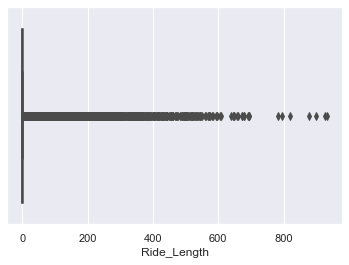

In [16]:
%matplotlib inline     
sns.set(color_codes=True)
sns.boxplot(x=df_clean['Ride_Length'])

In [17]:
df_clean['Ride_Length'].describe()

count    1.054754e+07
mean     3.565425e-01
std      3.013985e+00
min      1.694444e-02
25%      1.097222e-01
50%      1.919444e-01
75%      3.450000e-01
max      9.324025e+02
Name: Ride_Length, dtype: float64

In [18]:
df_clean.groupby('Day_of_Week')['member_casual'].count()

Day_of_Week
Friday       1512566
Monday       1362064
Saturday     1816143
Sunday       1552931
Thursday     1460086
Tuesday      1406777
Wednesday    1436978
Name: member_casual, dtype: int64

In [19]:
# sns.boxplot(x=clean_df['Ride_Length'])

In [20]:
df_clean.groupby(['Day_of_Week', 'member_casual'])['Ride_Length'].mean()

Day_of_Week  member_casual
Friday       casual           0.499366
             member           0.221112
Monday       casual           0.523674
             member           0.218372
Saturday     casual           0.575522
             member           0.252611
Sunday       casual           0.611709
             member           0.254903
Thursday     casual           0.453474
             member           0.214088
Tuesday      casual           0.463818
             member           0.213387
Wednesday    casual           0.450206
             member           0.213495
Name: Ride_Length, dtype: float64

In [21]:
df_clean.columns

Index(['rideable_type', 'started_at', 'ended_at', 'start_station_name',
       'end_station_name', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'Ride_Length', 'Day_of_Week'],
      dtype='object')

In [22]:
df_clean['rideable_type'].value_counts()

classic_bike     5556156
electric_bike    4512810
docked_bike       478579
Name: rideable_type, dtype: int64

In [23]:
df_clean['start_station_name'].value_counts().sort_values(ascending=False)[1:20]

Michigan Ave & Oak St                 81061
Wells St & Concord Ln                 77246
Millennium Park                       73878
Clark St & Elm St                     71956
Theater on the Lake                   67863
Wells St & Elm St                     65548
Kingsbury St & Kinzie St              62687
DuSable Lake Shore Dr & North Blvd    61980
DuSable Lake Shore Dr & Monroe St     59387
Clark St & Armitage Ave               59036
Clark St & Lincoln Ave                58401
Broadway & Barry Ave                  57316
Wabash Ave & Grand Ave                57121
Dearborn St & Erie St                 54769
Wells St & Huron St                   53952
Indiana Ave & Roosevelt Rd            53674
Wilton Ave & Belmont Ave              52438
St. Clair St & Erie St                51386
Shedd Aquarium                        50742
Name: start_station_name, dtype: int64

In [24]:
df_clean['end_station_name'].value_counts().sort_values(ascending=False)[1:10]

Michigan Ave & Oak St                 82016
Wells St & Concord Ln                 77401
Millennium Park                       74768
Clark St & Elm St                     70906
Theater on the Lake                   68158
DuSable Lake Shore Dr & North Blvd    67104
Wells St & Elm St                     64074
Kingsbury St & Kinzie St              60765
Clark St & Armitage Ave               58607
Name: end_station_name, dtype: int64

In [25]:
df_clean.columns

Index(['rideable_type', 'started_at', 'ended_at', 'start_station_name',
       'end_station_name', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'Ride_Length', 'Day_of_Week'],
      dtype='object')

In [26]:
#Cleaning up our columns:

dfML = df_clean.drop(['start_lat', 'end_lat', 'start_lng', 'end_lng','start_station_name','end_station_name','ended_at'], axis='columns')
dfML.head()

,rideable_type,started_at,member_casual,Ride_Length,Day_of_Week
0,electric_bike,2022-08-07 21:34:15,casual,0.125278,Sunday
1,electric_bike,2022-08-08 14:39:21,casual,0.233889,Monday
2,electric_bike,2022-08-08 15:29:50,casual,0.178889,Monday
3,electric_bike,2022-08-08 02:43:50,casual,0.250833,Monday
4,electric_bike,2022-08-07 20:24:06,casual,0.097778,Sunday


In [27]:
dfML['Ride_Length'] = dfML['Ride_Length'] * 60

In [28]:
dfML['Ride_Length'] = dfML['Ride_Length'].astype(int)

In [29]:
dfML.head()

,rideable_type,started_at,member_casual,Ride_Length,Day_of_Week
0,electric_bike,2022-08-07 21:34:15,casual,7,Sunday
1,electric_bike,2022-08-08 14:39:21,casual,14,Monday
2,electric_bike,2022-08-08 15:29:50,casual,10,Monday
3,electric_bike,2022-08-08 02:43:50,casual,15,Monday
4,electric_bike,2022-08-07 20:24:06,casual,5,Sunday


In [30]:
#Break datetime into integer value for Month
dfML['Month'] = dfML['started_at'].dt.month

In [31]:
dfML.Month.value_counts()

7     1615118
8     1561038
6     1471292
9     1430748
10    1166611
5     1145494
4      696250
3      504382
11     354062
12     243586
1      197303
2      161661
Name: Month, dtype: int64

In [32]:
dfML['Season'] = pd.cut(dfML['Month'],
                            [0,3,9,12],
                            labels = ['Cold', 'Warm', 'Cold'],
                             include_lowest=True,
                            ordered=False)

In [33]:
dfML['Part_of_Weekend'] = np.where((dfML['Day_of_Week'] == 'Saturday') | (dfML['Day_of_Week'] == 'Sunday'), 1,0)

In [34]:
#Break datetime into integer value for hour
dfML['Hours'] = dfML['started_at'].dt.hour

In [35]:
dfML['Part_of_Day'] = pd.cut(dfML['Hours'],
                            [0,4,8,16,20,23],
                            labels = ['Late_Night', 'Morning', 'Afternoon','Evening', 'Night'],
                             include_lowest=True,
                            ordered=False)

In [36]:
dfML.Part_of_Day.value_counts()

Afternoon     4920554
Evening       3130131
Morning       1148337
Night          945685
Late_Night     402838
Name: Part_of_Day, dtype: int64

In [37]:
dfML['Ride_Type'] = np.where(dfML['member_casual'] == 'member',1,0)

In [38]:
dfML.columns

Index(['rideable_type', 'started_at', 'member_casual', 'Ride_Length',
       'Day_of_Week', 'Month', 'Season', 'Part_of_Weekend', 'Hours',
       'Part_of_Day', 'Ride_Type'],
      dtype='object')

In [39]:
bt_dummies = pd.get_dummies(dfML['rideable_type'])

In [40]:
seasons_dummies = pd.get_dummies(dfML['Season'])

In [41]:
pod_dummies = pd.get_dummies(dfML['Part_of_Day'])

In [42]:
dfML = pd.concat([dfML, bt_dummies, seasons_dummies, pod_dummies], axis=1)

In [43]:
dfML = dfML.drop(columns = ['Part_of_Day', 'Day_of_Week', 'Season','started_at', 'rideable_type', 'member_casual'])

In [44]:
dfML.head()

,Ride_Length,Month,Part_of_Weekend,Hours,Ride_Type,classic_bike,docked_bike,electric_bike,Cold,Warm,Late_Night,Morning,Afternoon,Evening,Night
0,7,8,1,21,0,0,0,1,0,1,0,0,0,0,1
1,14,8,0,14,0,0,0,1,0,1,0,0,1,0,0
2,10,8,0,15,0,0,0,1,0,1,0,0,1,0,0
3,15,8,0,2,0,0,0,1,0,1,1,0,0,0,0
4,5,8,1,20,0,0,0,1,0,1,0,0,0,1,0


In [45]:
dfML.fillna("NotatDock", inplace=True)

In [46]:
dfML.isna().sum()

Ride_Length        0
Month              0
Part_of_Weekend    0
Hours              0
Ride_Type          0
classic_bike       0
docked_bike        0
electric_bike      0
Cold               0
Warm               0
Late_Night         0
Morning            0
Afternoon          0
Evening            0
Night              0
dtype: int64

In [47]:
dfML.columns

Index(['Ride_Length', 'Month', 'Part_of_Weekend', 'Hours', 'Ride_Type',
       'classic_bike', 'docked_bike', 'electric_bike', 'Cold', 'Warm',
       'Late_Night', 'Morning', 'Afternoon', 'Evening', 'Night'],
      dtype='object')

In [48]:
from sklearn.model_selection import train_test_split
y = dfML['Ride_Type']
X = dfML.drop(['Ride_Type'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

In [49]:
#checking training data 
y_train.value_counts()

1    4146000
0    3237281
Name: Ride_Type, dtype: int64

In [50]:
X_train.value_counts()

Ride_Length  Month  Part_of_Weekend  Hours  classic_bike  docked_bike  electric_bike  Cold  Warm  Late_Night  Morning  Afternoon  Evening  Night
6            8      0                17     1             0            0              0     1     0           0        0          1        0        2880
7            8      0                17     1             0            0              0     1     0           0        0          1        0        2815
5            8      0                17     1             0            0              0     1     0           0        0          1        0        2783
6            9      0                17     1             0            0              0     1     0           0        0          1        0        2738
8            8      0                17     1             0            0              0     1     0           0        0          1        0        2658
                                                                                          

In [51]:
#Lets double check we have no relevant nulls
X_test.isna().sum()

Ride_Length        0
Month              0
Part_of_Weekend    0
Hours              0
classic_bike       0
docked_bike        0
electric_bike      0
Cold               0
Warm               0
Late_Night         0
Morning            0
Afternoon          0
Evening            0
Night              0
dtype: int64

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [53]:
clf = RandomForestClassifier(n_estimators = 100, random_state = 20)
rf_train = clf.fit(X_train,y_train)

In [54]:
y_pred = clf.predict(X_test)

In [55]:
clf.predict_proba(X)[0:5]

array([[0.48269444, 0.51730556],
       [0.59633054, 0.40366946],
       [0.48405879, 0.51594121],
       [0.67647139, 0.32352861],
       [0.55060248, 0.44939752]])

In [56]:
importance = list(zip(X, clf.feature_importances_))
print(importance)

[('Ride_Length', 0.40522609238786916), ('Month', 0.05780191863948374), ('Part_of_Weekend', 0.07000817709467337), ('Hours', 0.05122982041822269), ('classic_bike', 0.0602546962010843), ('docked_bike', 0.1947048811912125), ('electric_bike', 0.04366953525620037), ('Cold', 0.027684356569922495), ('Warm', 0.026230148717383023), ('Late_Night', 0.010750802801450568), ('Morning', 0.03983374167747389), ('Afternoon', 0.0036504863158682366), ('Evening', 0.002450991883063556), ('Night', 0.006504350846091985)]


In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.51      0.57   1388914
           1       0.67      0.80      0.73   1775350

    accuracy                           0.67   3164264
   macro avg       0.67      0.65      0.65   3164264
weighted avg       0.67      0.67      0.66   3164264



In [58]:
accuracy = (metrics.accuracy_score(y_test, y_pred)) * 100
accuracy

67.03353449648955

Ride Length plus Time

In [76]:
dfML_time = dfML[['Ride_Type','Ride_Length', 'Month', 'Part_of_Weekend', 'classic_bike','electric_bike','docked_bike']].copy()

In [77]:
yt = dfML_time['Ride_Type']
Xt = dfML_time.drop(['Ride_Type'], axis=1)
Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt,yt, test_size=0.3, random_state=30)

In [78]:
clft = RandomForestClassifier(n_estimators = 100, random_state = 20)
rft_train = clft.fit(Xt_train,yt_train)

In [79]:
yt_pred = clft.predict(Xt_test)

In [80]:
clft.predict_proba(Xt)[0:5]

array([[0.52866453, 0.47133547],
       [0.50422339, 0.49577661],
       [0.47697651, 0.52302349],
       [0.49850814, 0.50149186],
       [0.49352996, 0.50647004]])

In [81]:
impt = list(zip(Xt, clft.feature_importances_))
impt

[('Ride_Length', 0.4234856396202953),
 ('Month', 0.11646362692367655),
 ('Part_of_Weekend', 0.09601708847300512),
 ('classic_bike', 0.06321905399542105),
 ('electric_bike', 0.05716287816071255),
 ('docked_bike', 0.24365171282688944)]

In [82]:
print(classification_report(yt_test, yt_pred))

              precision    recall  f1-score   support

           0       0.67      0.46      0.55   1388914
           1       0.66      0.82      0.73   1775350

    accuracy                           0.66   3164264
   macro avg       0.67      0.64      0.64   3164264
weighted avg       0.67      0.66      0.65   3164264



In [83]:
acct = (metrics.accuracy_score(yt_test, yt_pred)) * 100
acct

66.4368080539424